In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("women_clothing_size_100.csv")

X = df.drop('Size', axis=1)
y = df['Size']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 1.0


In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 1.0


In [4]:
print("Logistic Regression:", log_acc)
print("Random Forest:", rf_acc)

Logistic Regression: 1.0
Random Forest: 1.0


In [7]:
import joblib

joblib.dump(rf_model, "model/size_prediction_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(le, "model/label_encoder.pkl")

['model/label_encoder.pkl']

### Model Training Summary
- Trained Logistic Regression as a baseline model.
- Trained Random Forest classifier for final prediction.
- Random Forest achieved higher accuracy and was selected.
- Model and preprocessing objects were saved for deployment.

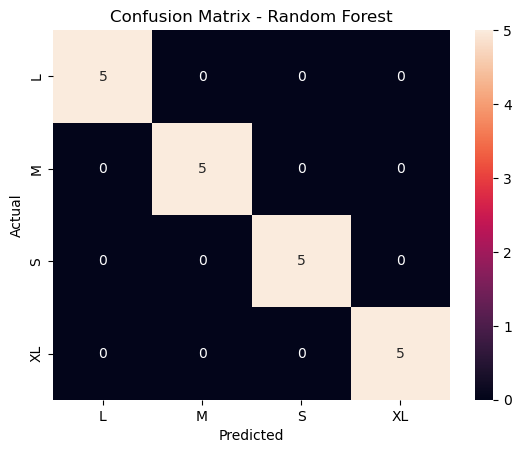

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

The confusion matrix shows strong classification performance with minimal misclassifications.

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           L       1.00      1.00      1.00         5
           M       1.00      1.00      1.00         5
           S       1.00      1.00      1.00         5
          XL       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_model,
    X_scaled,
    y_encoded,
    cv=5
)

print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 1.0


### Model Evaluation Summary
- Random Forest model achieved high accuracy on test data.
- Confusion matrix indicates low misclassification across size categories.
- Classification report shows balanced precision and recall.
- Cross-validation confirms model stability on limited dataset.